In [1]:
from collections import Counter
# from linear_algebra import distance, vector_subtract, scalar_multiply 
from functools import reduce
import math, random

In [2]:
def sum_of_squares(v):
    return sum(v_i ** 2 for v_i in v)


In [16]:
# 미분 정의
def difference_quotient(f, x, h):
    return (f(x+h) - f(x))/ h

In [17]:
def plot_estimated_derivative():
    def square(x):
        return x*x
    
    def derivative(x):
        return 2 * x
    
    derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)

    import matplotlib.pyplot as plt

    x = range(-10,10)
    plt.plot(x, list(map(derivative, x)), 'rx', label='Actual')
    plt.plot(x, list(map(derivative_estimate, x)), 'b+', label='Estimate')
    plt.legend(loc=9)
    plt.title('Actual vs Estimate')
    plt.show()


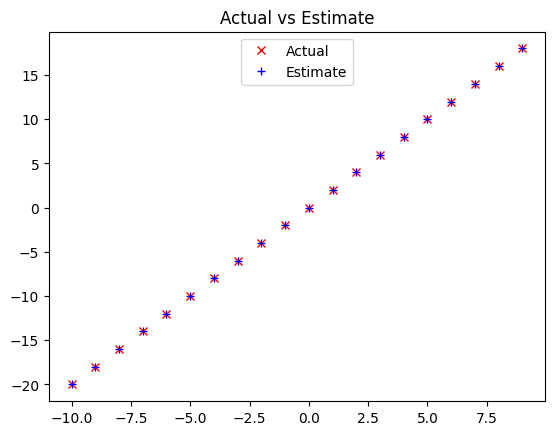

In [18]:
%matplotlib inline
plot_estimated_derivative()

In [6]:
def partial_difference_quotient(f, v, i, h):
    w = [v_j + (h if j == i else 0)
         for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

In [7]:
def estimate_gradient(f, v, h =0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

In [8]:
estimate_gradient(sum_of_squares,[1.,1.,1])

[2.00001000001393, 2.00001000001393, 2.00001000001393]

In [9]:
import numpy as np

def estimate_gradient_np(f, v, h=0.0001):
    return (np.apply_along_axis(f, 1, v + h * np.eye(v.shape[0])) - f(v)) / h

In [10]:
estimate_gradient_np(lambda v: np.sum(v*v), np.array([1.,1.,1]))

array([2.0001, 2.0001, 2.0001])

In [11]:
def step(v, direction, step_size):
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2*v_i for v_i in v]

In [12]:
def step_np(v, direction, step_size):
    return v + step_size * direction

def sum_of_squares_gradient_np(v):
    return 2* v


In [22]:
print("using the gradient")

v = [random.randint(-10,10)for i in range(3)]

tolerance = 0.0000001
while True:
    gradient = sum_of_squares_gradient(v)
    next_v = step(v, gradient, -0.01)
    # if distance(next_v, v) < tolerance:
        break
    v = next_v

print("minimum v", v)
print("minimum value", sum_of_squares(v))
print()

using the gradient
minimum v [2, -7, 8]
minimum value 117



In [23]:
step_size = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

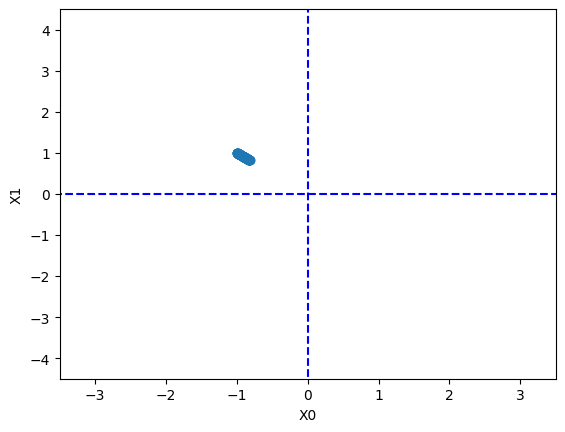

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def sum_of_squares_np(v):
    return 2*v

def gradient_descent(gradient_f, init_x, lr= 0.01, step_num=10000, tolerance = 0.0000001):
    x = init_x
    x_history = []
    for i in range(step_num):
        x_history.append(x.copy())
        x_prev = x.copy()
        x -= lr * gradient_f(x)
        if np.linalg.norm(x-x_prev) < tolerance:
            break
    return x, x_history

init_x = np.array([-1.0, 1.0])
lr = 0.001
step_num = 100
x, x_history = gradient_descent(sum_of_squares_gradient_np, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
x_history = np.array(x_history) 
plt.plot(x_history[:,0], x_history[:,1], 'o')
plt.xlim(-3.5, 3.5) 
plt.ylim(-4.5, 4.5) 
plt.xlabel("X0") 
plt.ylabel("X1") 
plt.show()

In [25]:
def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

In [26]:
# target_fn: 최소화하는 대상 함수
# gradient_fn: theta에 대한 target_fn의 그레디언트를 계산하는 함수
# theta_0: 최적화 과정이 시작되는 theta의 초기값
# tolerance: 수렴에 대한 허용 오차를 지정하는 선택적 매개변수
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance = 0.000001):
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

    theta = theta_0
    target_fn = safe(target_fn) 
    value = target_fn(theta)

    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes]
        
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)

        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

In [27]:
minimize_batch(sum_of_squares, sum_of_squares_gradient, [10,20,4,5])

[0.0006805647338418772,
 0.0013611294676837543,
 0.00027222589353675085,
 0.0003402823669209386]

In [28]:
minimize_batch(sum_of_squares, sum_of_squares_gradient, [10,20,4,5,0,1])

[0.0006805647338418772,
 0.0013611294676837543,
 0.00027222589353675085,
 0.0003402823669209386,
 0.0,
 6.805647338418771e-05]

In [29]:
def myf(v):
    return (v[0] -3)**2 + (v[1]-2)**2

def myf_gradient(v):
    return [2.0*v[0] -6, 2.0*v[1]-4]

minimize_batch(myf, myf_gradient, [5000., 50.])

[3.0016059738814325, 2.000015426605225]

In [30]:
from functools import partial

def f1(x, c):
    x = np.array(x)
    c = np.array(c)
    return np.sum((x-c)**2)

def f1_gradient(x, c):
    x = np.array(x)
    c = np.array(c)
    return 2*x -2*c

def numerical_gradient(v, f, h= 0.00001):
    return (f(v) - np.apply_along_axis(f, 1, v-h * np.eye(len(v))))/h

c = np.array([7,70,7,4])

f= partial(f1, c=c)

gradient_f = partial(f1_gradient, c=c)

minimize_batch(f, gradient_f, [0,0,0,0])

[6.999843894783611, 69.99843894783609, 6.999843894783611, 3.9999107970192056]

In [31]:
def negate(f):
    """return a function that for any input x returns -f(x)""" 
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    """the same when f returns a list of numbers"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001): 
    return minimize_batch(negate(target_fn),
                            negate_all(gradient_fn),
                            theta_0,
                            tolerance)

In [32]:
from functools import partial
def normal_pdf(npx, mu, sigma): 
    x = npx[0]
    return ((1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2)))) 

def numerical_gradient(v, f, h=0.00001):
    return (np.apply_along_axis(f, 1, v + h * np.eye(len(v))) - f(v)) / h

f = partial(normal_pdf, mu=0, sigma=1) 
gradient_f = partial(numerical_gradient, f=f) 
init_x = np.array([-4.])
maximize_batch(f, gradient_f, init_x)

[-0.0023954427570109793]

In [33]:
def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)] # create a list of indexes 
    random.shuffle(indexes) # shuffle them
    for i in indexes: # return the data in that order
        yield data[i]

In [34]:
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01): 
    data = list(zip(x, y))
    theta = theta_0
    alpha = alpha_0
    min_theta, min_value = None, float("inf") 
    iterations_with_no_improvement = 0
    # initial guess
    # initial step size
    # the minimum so far
    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )

        if value < min_value:
            # if we've found a new minimum, remember it 
            # # and go back to the original step size 
            min_theta, min_value = theta, value 
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size 
            iterations_with_no_improvement += 1
            alpha *= 0.9
            # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
    return min_theta

In [35]:
def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01): 
    return minimize_stochastic(negate(target_fn),
                               negate_all(gradient_fn),
                               x, y, theta_0, alpha_0)

In [37]:
def in_random_order(data):
    indexes = [i for i, _ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]

In [ ]:
def maximize_stochastic